In [5]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Load JSON file into a dictionary
dir = '../../data/training/'

# TODO was ist der Unterschied zwischen den beiden Files? Bzw. warum sind die Werte verschieden bei gleichen keys?
file1 = 'demo_submission_train.json'
file2 = 'ground_truth_train.json'

with open(dir + file2) as f:
    data_dict = json.load(f)

# Convert dictionary to pandas DataFrame
df = pd.DataFrame(data_dict)

# Transpose DataFrame because data is the wrong way around
df = df.T

In [7]:
df.head()

,height,fw_plant,leaf_area,number_of_red_fruits
B_0328ab97,36.0,490.97,2169.45,24.0
B_93dd57ad,23.0,58.93,1018.14,0.0
D_b14ffae7,35.0,265.11,1512.11,12.0
C_fad72fa4,24.0,17.57,283.79,0.0
D_f4114910,41.0,81.80,1048.75,0.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 268 entries, B_0328ab97 to C_9e135b2f
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   height                268 non-null    float64
 1   fw_plant              267 non-null    float64
 2   leaf_area             267 non-null    float64
 3   number_of_red_fruits  268 non-null    float64
dtypes: float64(4)
memory usage: 10.5+ KB


In [9]:
# Check for NaN values
# The classes do have to be removed in order to have no strings in the data to be able to check for NaN's
data_without_class = df.iloc[:, :6]
nanCounter = np.isnan(data_without_class).sum()
print(nanCounter)

height                  0
fw_plant                1
leaf_area               1
number_of_red_fruits    0
dtype: int64


In [10]:
# Check for unique values
distinctCounter = data_without_class.apply(lambda x: len(x.unique()))
print(distinctCounter)

height                   53
fw_plant                264
leaf_area               268
number_of_red_fruits     34
dtype: int64


In [11]:
df.describe()

,height,fw_plant,leaf_area,number_of_red_fruits
count,268.000000,267.000000,267.000000,268.000000
mean,33.294403,163.783446,1066.685685,4.828358
std,9.814798,199.321745,711.967925,11.191909
min,18.000000,9.680000,55.288000,0.000000
25%,26.000000,26.890000,447.485000,0.000000
50%,30.250000,70.350000,958.450000,0.000000
75%,41.000000,233.615000,1522.445000,5.000000
max,76.000000,969.730000,4287.850000,124.000000


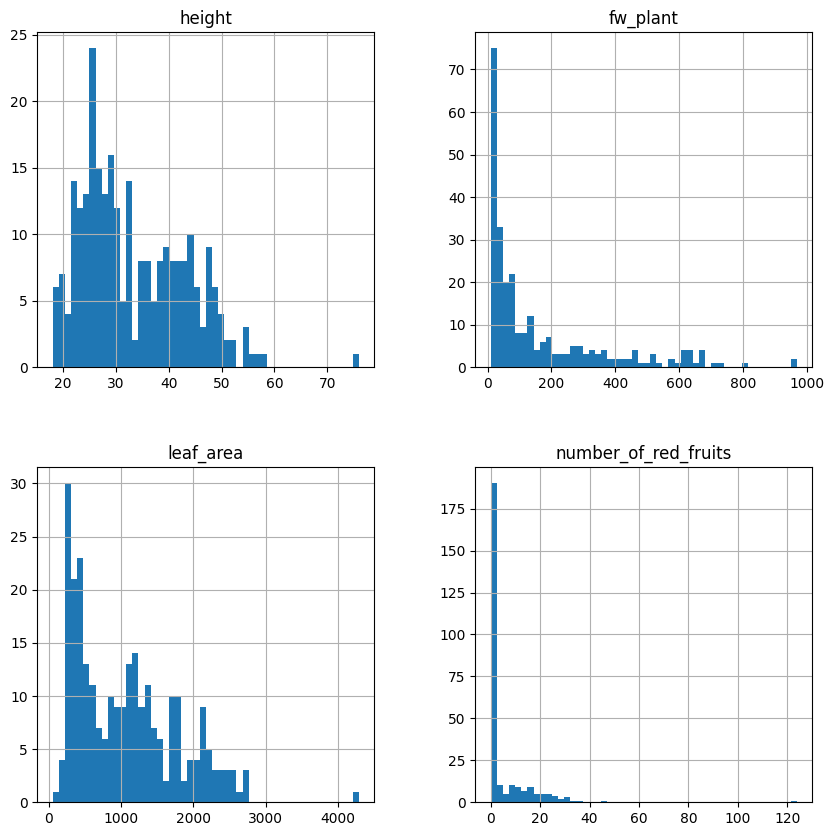

In [12]:
# Histogram data
df.hist(bins=50, figsize=(10,10))
plt.show()

# y-axis is the number of occurences
# x-axis is the value of the variable in the dataset

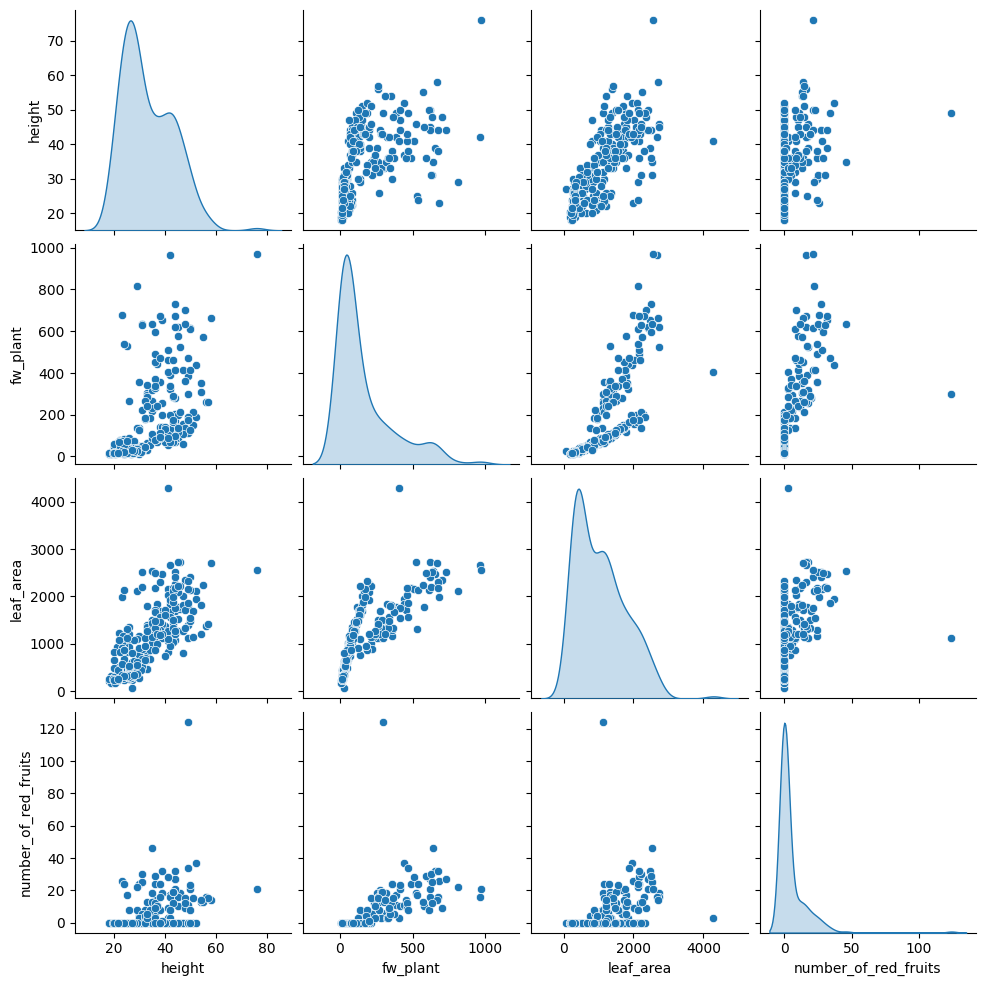

In [13]:
# Plotting the variables against each other
sns.pairplot(df, diag_kind='kde')
plt.show()

In [14]:
correlationMatrix = df.corr()
correlationMatrix.style.background_gradient(cmap='viridis')

,height,fw_plant,leaf_area,number_of_red_fruits
height,1.000000,0.577074,0.724195,0.373728
fw_plant,0.577074,1.000000,0.814551,0.658791
leaf_area,0.724195,0.814551,1.000000,0.456053
number_of_red_fruits,0.373728,0.658791,0.456053,1.000000


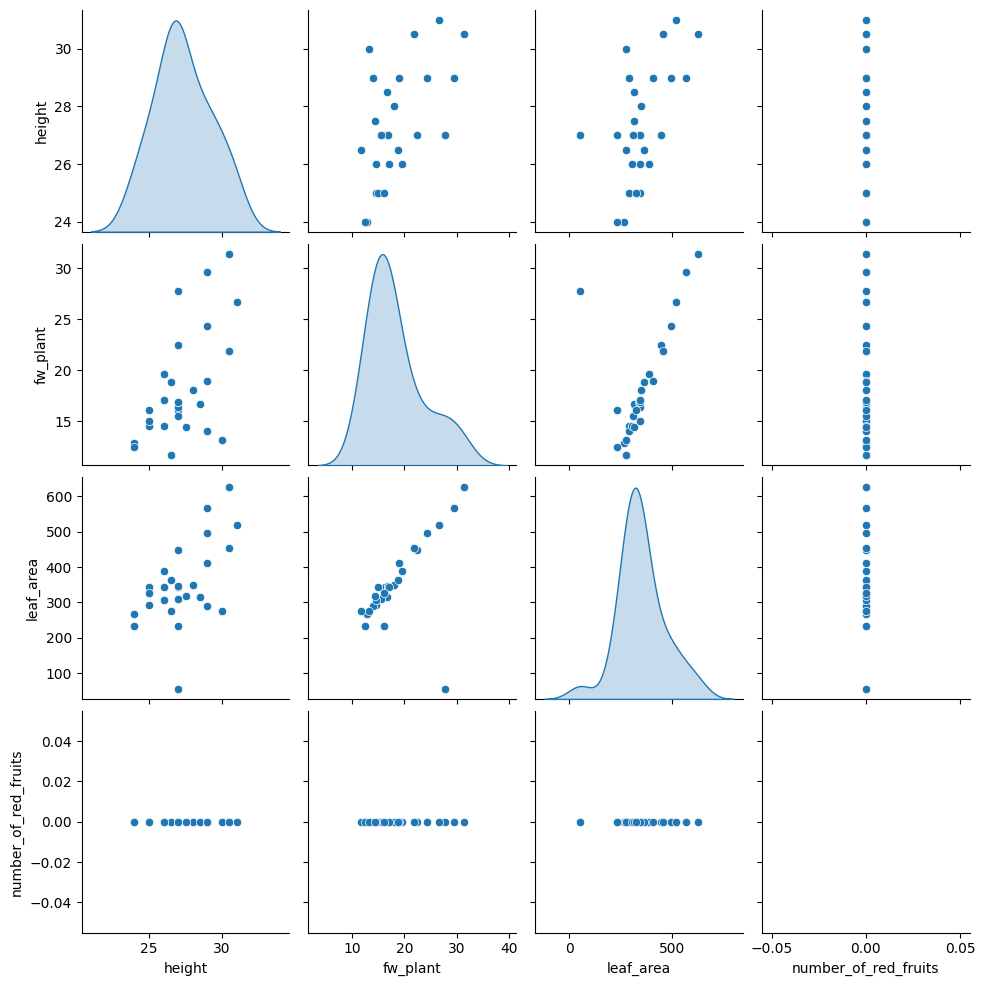

In [18]:
# different plots for A, B, C and D
data_A = {key:data for key, data in data_dict.items() if "A_" in key}
# Convert dictionary to pandas DataFrame
sns.pairplot(pd.DataFrame(data_A).T, diag_kind='kde')
plt.show()

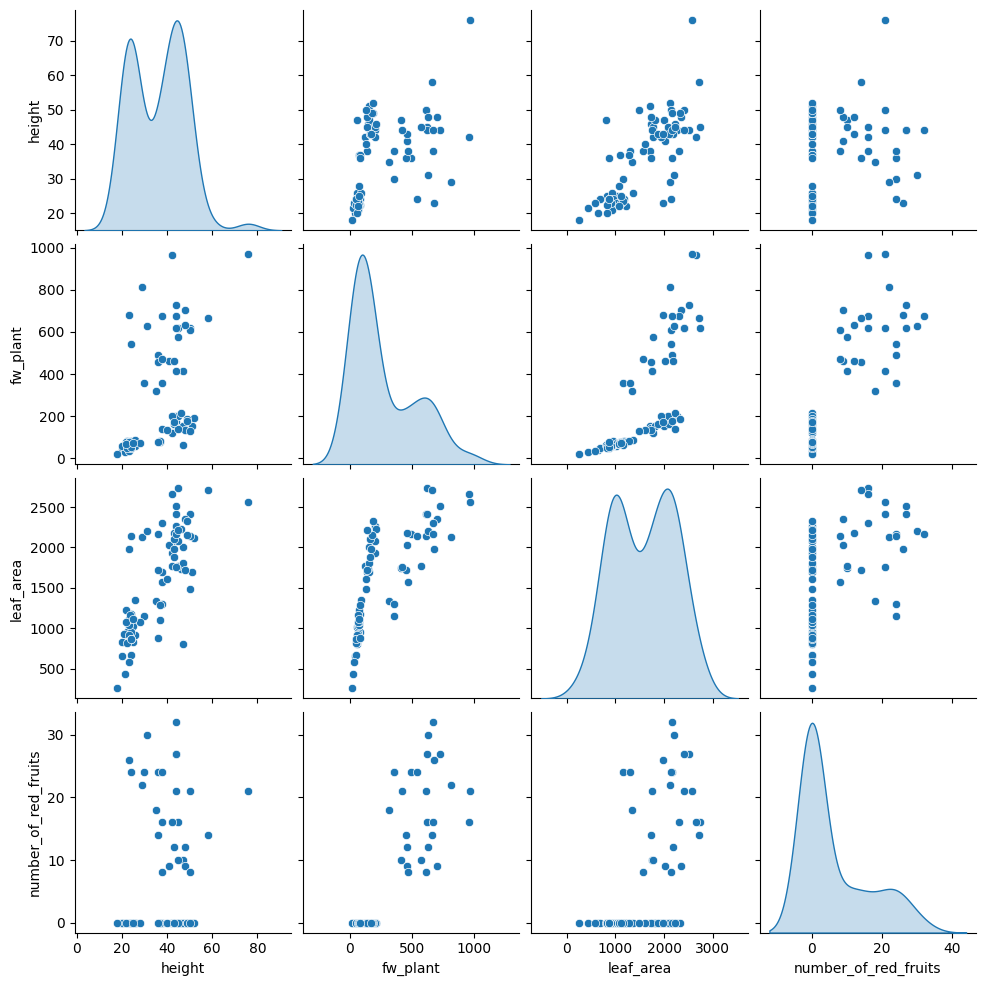

In [19]:
# different plots for A, B, C and D
data = {key:data for key, data in data_dict.items() if "B_" in key}
# Convert dictionary to pandas DataFrame
sns.pairplot(pd.DataFrame(data).T, diag_kind='kde')
plt.show()

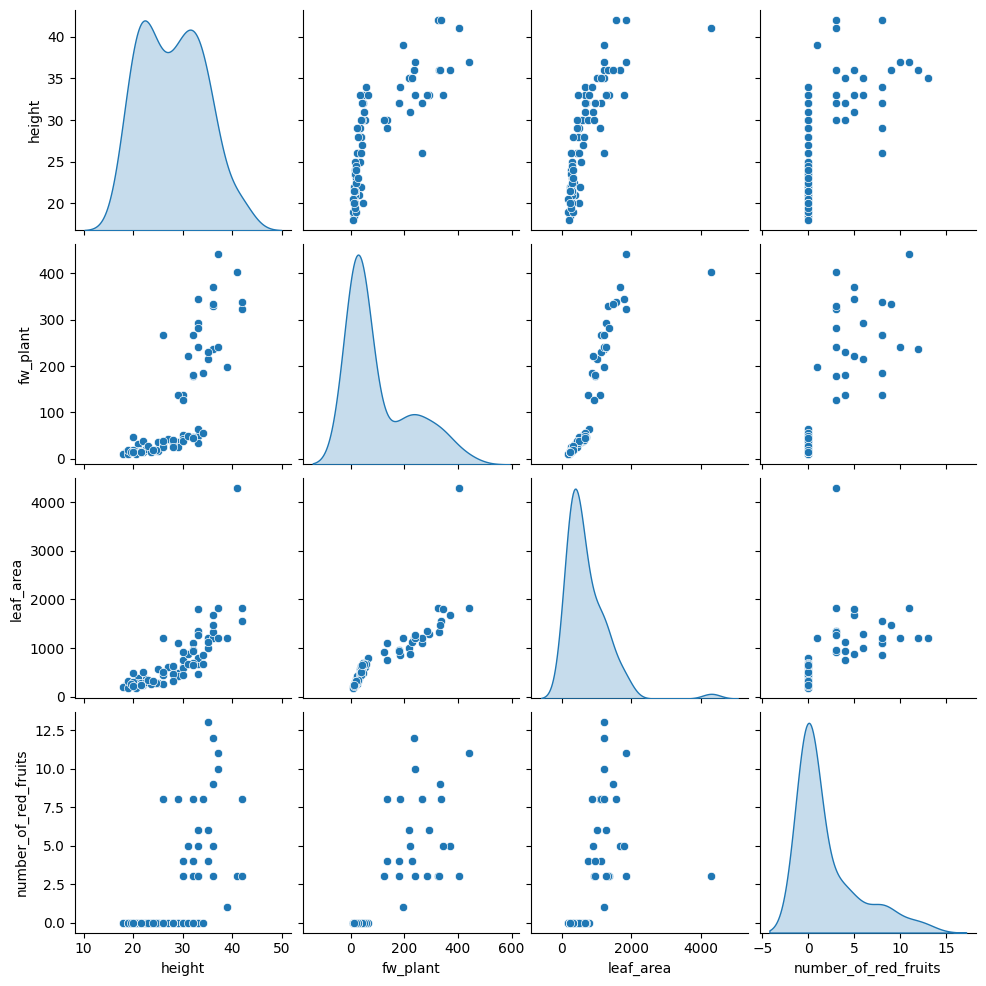

In [21]:
# different plots for A, B, C and D
data = {key:data for key, data in data_dict.items() if "C_" in key}
# Convert dictionary to pandas DataFrame
sns.pairplot(pd.DataFrame(data).T, diag_kind='kde')
plt.show()

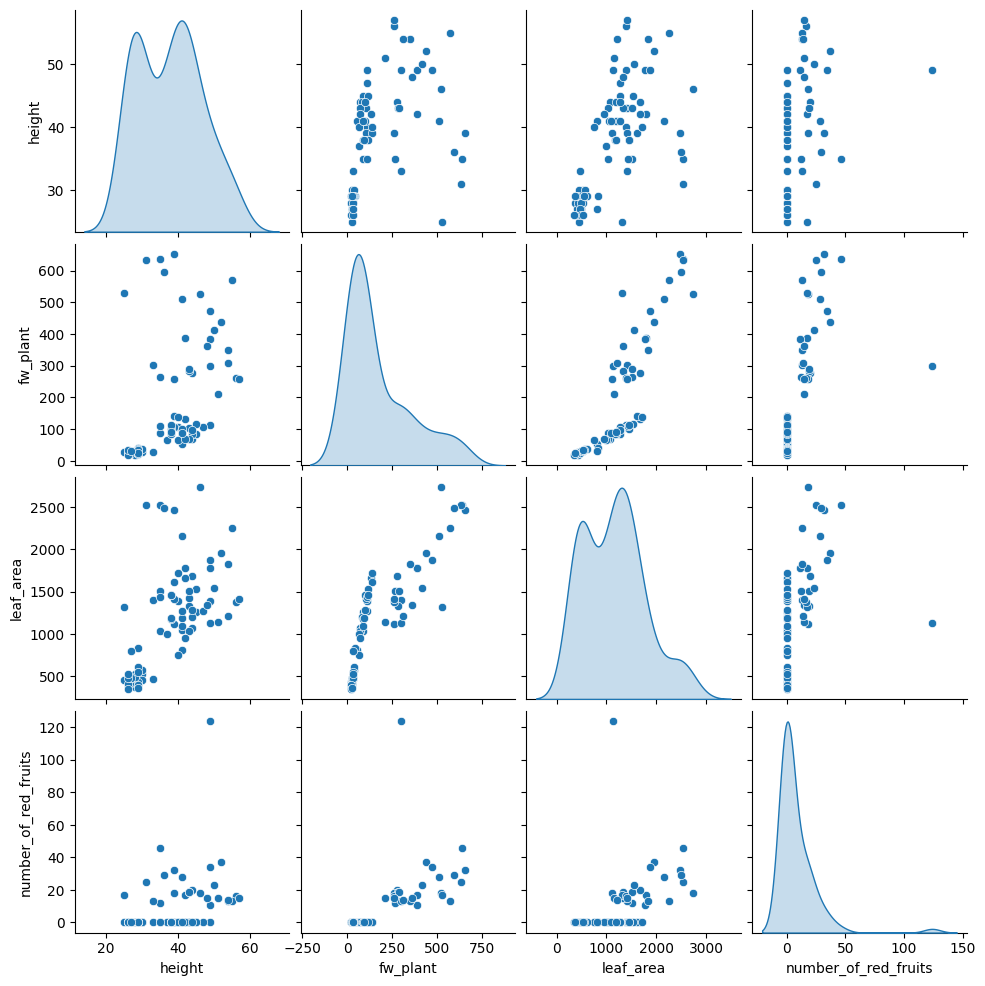

In [20]:
# different plots for A, B, C and D
data = {key:data for key, data in data_dict.items() if "D_" in key}
# Convert dictionary to pandas DataFrame
sns.pairplot(pd.DataFrame(data).T, diag_kind='kde')
plt.show()